#### MATH 448 Project Report 1 (MCL): 
#### Understanding Public Data and Predict Probability of Success of Newly Opening Business.


* Data Destribution

* Linear Regression Modeling

* Decision Tree Modeling

* Lasso Regression Modeling


To train a model using your train_data and then predict Case_Count for the test_data, you can follow these general steps:

1. **Data Preprocessing**: First, preprocess your train_data and test_data. This involves tasks such as handling missing values, encoding categorical variables (if any), and scaling numerical features (if necessary).

2. **Feature Selection/Engineering**: Identify relevant features that can help predict the Case_Count. You might want to consider features such as Year, Neighborhood, Latitude, and Longitude. You can also create new features if needed.

3. **Model Selection**: Choose a suitable machine learning model for your problem. Since you want to predict a numerical value (Case_Count), regression models would be appropriate. You can start with simple models like Linear Regression and then explore more complex models like Random Forest Regressor or Gradient Boosting Regressor.

4. **Model Training**: Train your selected model using the train_data. Split the train_data into training and validation sets to evaluate the model's performance.

5. **Model Evaluation**: Evaluate the trained model's performance on the validation set using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).

6. **Model Tuning (Optional)**: If necessary, tune the hyperparameters of your model to improve its performance. You can use techniques like grid search or randomized search for hyperparameter tuning.

7. **Model Prediction**: Once you have a trained and validated model, use it to predict the Case_Count for the test_data.


In [1]:
# Requring Library
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

In [2]:
# Read csv file
train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")

# Rename columns in train_data
train_data.rename(columns={'Median_Latitude': 'Latitude', 'Median_Longitude': 'Longitude'}, inplace=True)

# Assuming train_data and test_data are DataFrames
# Concatenate train and test data for preprocessing
all_data = pd.concat([train_data, test_data], ignore_index=True)


In [3]:
# Assuming 'Neighborhood' is the only categorical variable
categorical_cols = ['Neighborhood']
numeric_cols = ['Year', 'Latitude', 'Longitude']


# Model Training
X = train_data[categorical_cols + numeric_cols]
y = train_data['Case_Count']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # No preprocessing for numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # You can replace this with any regressor of your choice
])

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Model Evaluation 
# Predict on the validation set and calculate MAE
val_predictions = model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_predictions)
print(f'Validation MAE: {val_mae}')

# Prediction
# Predict Case_Count for test_data
test_predictions = model.predict(test_data[categorical_cols + numeric_cols])


Validation MAE: 473.79921914357686


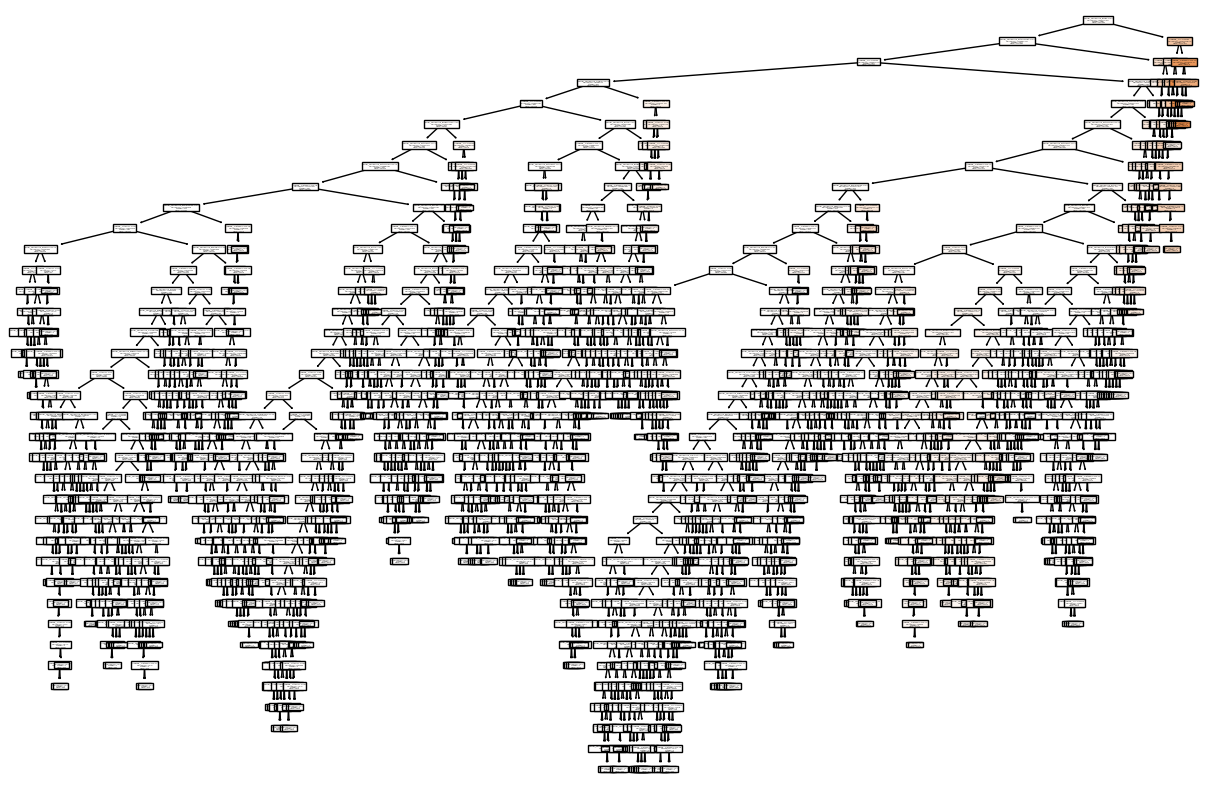

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the column transformer to one-hot encode categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as they are
)

# Fit the column transformer and transform the training data
X_train_encoded = column_transformer.fit_transform(X_train)

# Fit the regression tree to the encoded training data
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_encoded, y_train)

# Plot the regression tree
plt.figure(figsize=(15, 10))
plot_tree(reg_tree, feature_names=column_transformer.get_feature_names_out(), filled=True)
plt.show()

In [ ]:
# Add predicted values as a new column in test_data
test_data['Predicted_Case_Count'] = test_predictions

# Sort test_data based on the 'Predicted_Case_Count' column in descending order
test_data_sorted = test_data.sort_values(by='Predicted_Case_Count', ascending=False)

# Display the sorted DataFrame
test_data_sorted

,Neighborhood,Latitude,Longitude,Year,Predicted_Case_Count
468,South of Market,37.783278,-122.397824,2024,11718.58
202,South of Market,37.783544,-122.399010,2024,11718.58
309,Lower Nob Hill,37.790394,-122.417046,2024,11256.20
615,Lower Nob Hill,37.791055,-122.418180,2024,11255.89
593,Lower Nob Hill,37.791190,-122.418140,2024,11255.89
...,...,...,...,...,...
417,Grand Lake,37.813860,-122.246640,2024,20.50
419,San Pablo Gateway,37.813587,-122.278641,2024,20.50
721,Northgate / Koreatown,37.816290,-122.274800,2024,20.50
389,Northgate / Koreatown,37.816290,-122.274800,2024,20.50


In [ ]:
# Get the top 10 businesses based on 'Predicted_Case_Count'
top_10_businesses = test_data_sorted.head(10)

# Get the business name from yelp_data
yelp_data = pd.read_csv("data/yelp_data.csv")

# Merge top_10_businesses with yelp_data on latitude and longitude
merged_data = pd.merge(top_10_businesses, yelp_data, on=['Latitude', 'Longitude'], how='left')


# Display the merged data with the new 'Name' column
merged_data[['Name', 'Neighborhood','Predicted_Case_Count']]

,Name,Neighborhood,Predicted_Case_Count
0,Carlos Shoe Service,South of Market,11718.58
1,Museum Parc Cleaners,South of Market,11718.58
2,Bay Breeze Cleaners,Lower Nob Hill,11256.20
3,Busy B Coin,Lower Nob Hill,11255.89
4,Busy B Coin,Lower Nob Hill,11255.89
5,Today's Laundromat,Lower Nob Hill,11255.89
6,Today's Laundromat,Lower Nob Hill,11255.89
7,Busy B Coin,Lower Nob Hill,11255.89
8,Busy B Coin,Lower Nob Hill,11255.89
9,Today's Laundromat,Lower Nob Hill,11255.89


In [33]:
# Define Linear Regression model
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Linear Regression model
])

# Train Linear Regression model
linear_model.fit(X_train, y_train)

# Evaluate Linear Regression model on the validation set (Optional)
linear_val_predictions = linear_model.predict(X_val)
linear_val_mae = mean_absolute_error(y_val, linear_val_predictions)
print(f'Linear Model Validation MAE: {linear_val_mae}')

# Predict Case_Count for test_data using Linear Regression model
linear_test_predictions = linear_model.predict(test_data[categorical_cols + numeric_cols])

# Add predicted values as a new column in test_data
test_data['Predicted_Case_Count_Linear'] = linear_test_predictions

# Sort test_data based on the predicted case counts for Linear Regression model
test_data_sorted_linear = test_data.sort_values(by='Predicted_Case_Count_Linear', ascending=False)

# Display the sorted DataFrame for Linear Regression model
print("Test Data Sorted by Linear Regression Predictions:")
test_data_sorted_linear[['Neighborhood', 'Predicted_Case_Count_Linear']]


Linear Model Validation MAE: 946.3355867593406
Test Data Sorted by Linear Regression Predictions:


,Neighborhood,Predicted_Case_Count_Linear
202,South of Market,12522.034395
468,South of Market,12517.341635
391,Sharp Park,9211.711605
370,Sharp Park,9134.012568
693,Sharp Park,9134.012568
...,...,...
448,Easter Hill Village,-6197.700291
643,Easter Hill Village,-6535.323404
372,Easter Hill Village,-6535.323404
384,Easter Hill Village,-6577.892984


In [37]:
# Define Lasso Regression model
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())  # Lasso Regression model
])

# Train Lasso Regression model
lasso_model.fit(X_train, y_train)

# Evaluate Lasso Regression model on the validation set (Optional)
lasso_val_predictions = lasso_model.predict(X_val)
lasso_val_mae = mean_absolute_error(y_val, lasso_val_predictions)
print(f'Lasso Model Validation MAE: {lasso_val_mae}')

# Predict Case_Count for test_data using Lasso Regression model
lasso_test_predictions = lasso_model.predict(test_data[categorical_cols + numeric_cols])

# Add predicted values as a new column in test_data
test_data['Predicted_Case_Count_Lasso'] = lasso_test_predictions

# Sort test_data based on the predicted case counts for Lasso Regression model
test_data_sorted_lasso = test_data.sort_values(by='Predicted_Case_Count_Lasso', ascending=False)

# Display the sorted DataFrame for Lasso Regression model
print("\nTest Data Sorted by Lasso Regression Predictions:")
test_data_sorted_lasso[['Neighborhood', 'Predicted_Case_Count_Lasso']]


Lasso Model Validation MAE: 930.9391709337834

Test Data Sorted by Lasso Regression Predictions:


,Neighborhood,Predicted_Case_Count_Lasso
202,South of Market,12874.096481
468,South of Market,12874.086673
561,Tenderloin,7665.584613
109,Tenderloin,7665.584613
730,Tenderloin,7665.572780
...,...,...
29,Presidio Terrace,1579.931088
549,Presidio Terrace,1579.931088
303,Forest Hill,1510.569623
79,Seacliff,1334.015682


In [39]:
# Evaluate Linear Regression model on the validation set
linear_val_predictions = linear_model.predict(X_val)
linear_val_mae = mean_absolute_error(y_val, linear_val_predictions)

# Evaluate Random Forest Regression model on the validation set
random_forest_val_predictions = model.predict(X_val)
random_forest_val_mae = mean_absolute_error(y_val, random_forest_val_predictions)

# Evaluate Lasso Regression model on the validation set
lasso_val_predictions = lasso_model.predict(X_val)
lasso_val_mae = mean_absolute_error(y_val, lasso_val_predictions)

# Display MAE for all three models
print("Validation MAE for Linear Regression:", linear_val_mae)
print("Validation MAE for Random Forest Regression:", random_forest_val_mae)
print("Validation MAE for Lasso Regression:", lasso_val_mae)


Validation MAE for Linear Regression: 946.3355867593406
Validation MAE for Random Forest Regression: 461.75196473551637
Validation MAE for Lasso Regression: 930.9391709337834


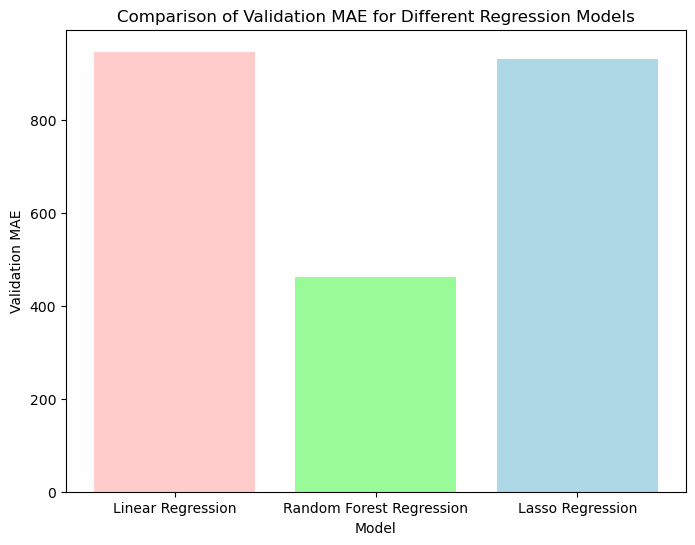

In [2]:
import matplotlib.pyplot as plt

# Validation MAE for each model
validation_mae = {
    'Linear Regression': 946.3355867593406,
    'Random Forest Regression': 461.75196473551637,
    'Lasso Regression': 930.9391709337834
}

# Define pastel colors
colors = ['#FFCCCB', '#98FB98', '#ADD8E6']

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(validation_mae.keys(), validation_mae.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Validation MAE')
plt.title('Comparison of Validation MAE for Different Regression Models')
plt.show()
